# **W02 Data Processing (数据处理)**

In [1]:
import pandas as pd  # 必须先导入 pandas 图书馆

In [2]:
# 读取本地 beer&curry 文件
path = 'E:/Jupyter Notebooks/COMM327/W02_Processing_Data/beer_AND_curry.csv'

# 注意所有的斜线 (dash)，要写【正斜线/】或【转移反斜线\\】

In [3]:
df = pd.read_csv(path)  # 读取 csv 文件为 dataframe

In [4]:
df  # 读取的 beer&curry 文件

,created_at,utc_time,mentions,text,url,retweet_count,favorite_count,user,user.location,user.followers_count,user.friends_count,user.created_at,user.favourites_count,user.verified
0,06/05/2020,11:11:49,NaN,NINE SPICES?????????????????\n?9??SPICE????NIN...,https://t.co/wddjIaJTcD,24,12,9spices,??????????2-1-2 HANROKU??B1,3820,1961,10/02/2010,296,False
1,07/07/2020,08:08:54,@lizzie_hubbard2 @JetsettersFlyin @suziday123 ...,Thanks for the invite to join #TravelWinePart...,https://t.co/6Z7GgkJE8v,6,17,ExpressionsSA,Cape Town South Africa,5088,5284,24/06/2011,15625,False
2,31/03/2020,13:39:02,@craftbeerncl! @RidgesideBrewer @Manjitskitche...,Lovely folk #Leeds delivered a mixed box of th...,https://t.co/XXsNBqu3ix,4,8,LeftyRedCat,"Leeds, Yorkshire, The North.",446,1583,22/06/2014,15457,False
3,29/05/2020,20:58:17,@StCannas @keralankaravan,the perfect evening guys! Thanks for the amaz...,https://t.co/3Ec1zryIlO,4,15,lukeybabeee,"Wales, United Kingdom",40,242,10/08/2013,73,False
4,28/11/2020,04:46:37,@yooneedmorejodi,Among other yummy treats: curry goat dumplings...,https://t.co/CHql64ZpIN,3,4,BitsAndBikkles,Jamaica,56,2,20/07/2020,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,30/12/2020,23:45:00,@Photos_in_Chile,This Alturis Muller Thurgau will make you kick...,https://t.co/TKqzhFmgHi,0,1,kitty_litter_1,NaN,210,523,26/06/2012,19994,False
426,30/08/2020,23:54:19,@jesshousty @WilliamHousty,I just made zucchini blossoms fried in a curry...,https://t.co/WRIeWKVQbE,0,1,mrauliuk,Treaty 1,599,576,12/06/2014,3264,False
427,04/03/2020,23:55:19,@beer_porter @siretoknote,??????????????????????????????????????????????...,https://t.co/Rd2xiyo6uk,0,1,comin_curry,Kushiro Hokkaido Japan,820,938,03/04/2011,41872,False
428,10/08/2020,23:55:38,NaN,Made the terrible horrible no-good mistake of ...,https://t.co/AF23qFRBTv,0,3,elizvogt,"NYC now, Texas forever",687,1105,07/03/2011,39909,False


# **1. Handling Missing / Anomalous Values**

## **1.1 Dropping NA data**

In [5]:
# 用 df.dropna() 函数清除 NA 值 (函数=function)
df_ = df.dropna(subset=['text','retweet_count'])  # df_ 是演示用的 dropna() 后的 df_


# df.dropna() 函数，括号内不填写任何参数 (parameter) 的话，默认直接删除 df 内所有包含 NA 值的【行】

#【subset 参数】
#    需要 dropna 的列 (column) 或列名 (label of a coloumn)，在这些【列】中每个 NA 值所在的【整行】都将被 drop
#    可以写 df.dropna(subset=['text','retweet_count']) ；或者把中括号改成小括号：df.dropna(subset=('text','user.location'))
#    小括号内的 'xxx','yyy'... 代表 labels of columns，而中括号代表单个或多个列 (用 list 表示的列)

# ⭕【注意】
#    预处理数据的时候，不必直接 drop 所有的 NA值。为了确保数据的准确性，可以只去除需要用于分析的【列】的 NA值 (所在的行)
#    例如，当我们只需要分析 “文本内容” 和 “转发数量” 的时候，只需要设定 subset 参数为这两个特定的【列】即可

In [6]:
df.shape  # 未经处理的原 df 大小

(430, 14)

In [7]:
df_.shape  # drop 特定两【列】中的 NA行 之后的 df_ 的大小

(429, 14)

## **1.2 Filling NA data**

### **1.2.1 用 `df.fillna()` 函数直接填充所有 NA 位** 

In [8]:
# 用 df.fillna() 函数填充特定列的 NA位（NA值所在的位置）

df['mentions'] = df['mentions'].fillna('No Mentioned User')

# 把 df 的 ['mentions'] 列中的所有 NA值 替换成 'No Mentioned User' 这段 string 值，然后赋值给原 df['mentions'] 列

In [9]:
df  # 此时 ['mentions'] 列中的 NA值 已经被替换成 'No Mentioned User' 字符串

,created_at,utc_time,mentions,text,url,retweet_count,favorite_count,user,user.location,user.followers_count,user.friends_count,user.created_at,user.favourites_count,user.verified
0,06/05/2020,11:11:49,No Mentioned User,NINE SPICES?????????????????\n?9??SPICE????NIN...,https://t.co/wddjIaJTcD,24,12,9spices,??????????2-1-2 HANROKU??B1,3820,1961,10/02/2010,296,False
1,07/07/2020,08:08:54,@lizzie_hubbard2 @JetsettersFlyin @suziday123 ...,Thanks for the invite to join #TravelWinePart...,https://t.co/6Z7GgkJE8v,6,17,ExpressionsSA,Cape Town South Africa,5088,5284,24/06/2011,15625,False
2,31/03/2020,13:39:02,@craftbeerncl! @RidgesideBrewer @Manjitskitche...,Lovely folk #Leeds delivered a mixed box of th...,https://t.co/XXsNBqu3ix,4,8,LeftyRedCat,"Leeds, Yorkshire, The North.",446,1583,22/06/2014,15457,False
3,29/05/2020,20:58:17,@StCannas @keralankaravan,the perfect evening guys! Thanks for the amaz...,https://t.co/3Ec1zryIlO,4,15,lukeybabeee,"Wales, United Kingdom",40,242,10/08/2013,73,False
4,28/11/2020,04:46:37,@yooneedmorejodi,Among other yummy treats: curry goat dumplings...,https://t.co/CHql64ZpIN,3,4,BitsAndBikkles,Jamaica,56,2,20/07/2020,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,30/12/2020,23:45:00,@Photos_in_Chile,This Alturis Muller Thurgau will make you kick...,https://t.co/TKqzhFmgHi,0,1,kitty_litter_1,NaN,210,523,26/06/2012,19994,False
426,30/08/2020,23:54:19,@jesshousty @WilliamHousty,I just made zucchini blossoms fried in a curry...,https://t.co/WRIeWKVQbE,0,1,mrauliuk,Treaty 1,599,576,12/06/2014,3264,False
427,04/03/2020,23:55:19,@beer_porter @siretoknote,??????????????????????????????????????????????...,https://t.co/Rd2xiyo6uk,0,1,comin_curry,Kushiro Hokkaido Japan,820,938,03/04/2011,41872,False
428,10/08/2020,23:55:38,No Mentioned User,Made the terrible horrible no-good mistake of ...,https://t.co/AF23qFRBTv,0,3,elizvogt,"NYC now, Texas forever",687,1105,07/03/2011,39909,False


### **1.2.2 用 `df.replace()` 更换特定值**

In [10]:
# 用 df.replace() 函数把上面用 df.fillna() 函数填充过的位置替换成新的值 0 (数字)
df['mentions'] = df['mentions'].replace('No Mentioned User', 0)  # 把 'No...' 换成 0

# 只更改 df['mentions'] 这一【列】

In [11]:
df  # 现在 df['mentions'] 列中的所有 'No Mentioned User' 值 都被替换成 0 值了。

,created_at,utc_time,mentions,text,url,retweet_count,favorite_count,user,user.location,user.followers_count,user.friends_count,user.created_at,user.favourites_count,user.verified
0,06/05/2020,11:11:49,0,NINE SPICES?????????????????\n?9??SPICE????NIN...,https://t.co/wddjIaJTcD,24,12,9spices,??????????2-1-2 HANROKU??B1,3820,1961,10/02/2010,296,False
1,07/07/2020,08:08:54,@lizzie_hubbard2 @JetsettersFlyin @suziday123 ...,Thanks for the invite to join #TravelWinePart...,https://t.co/6Z7GgkJE8v,6,17,ExpressionsSA,Cape Town South Africa,5088,5284,24/06/2011,15625,False
2,31/03/2020,13:39:02,@craftbeerncl! @RidgesideBrewer @Manjitskitche...,Lovely folk #Leeds delivered a mixed box of th...,https://t.co/XXsNBqu3ix,4,8,LeftyRedCat,"Leeds, Yorkshire, The North.",446,1583,22/06/2014,15457,False
3,29/05/2020,20:58:17,@StCannas @keralankaravan,the perfect evening guys! Thanks for the amaz...,https://t.co/3Ec1zryIlO,4,15,lukeybabeee,"Wales, United Kingdom",40,242,10/08/2013,73,False
4,28/11/2020,04:46:37,@yooneedmorejodi,Among other yummy treats: curry goat dumplings...,https://t.co/CHql64ZpIN,3,4,BitsAndBikkles,Jamaica,56,2,20/07/2020,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,30/12/2020,23:45:00,@Photos_in_Chile,This Alturis Muller Thurgau will make you kick...,https://t.co/TKqzhFmgHi,0,1,kitty_litter_1,NaN,210,523,26/06/2012,19994,False
426,30/08/2020,23:54:19,@jesshousty @WilliamHousty,I just made zucchini blossoms fried in a curry...,https://t.co/WRIeWKVQbE,0,1,mrauliuk,Treaty 1,599,576,12/06/2014,3264,False
427,04/03/2020,23:55:19,@beer_porter @siretoknote,??????????????????????????????????????????????...,https://t.co/Rd2xiyo6uk,0,1,comin_curry,Kushiro Hokkaido Japan,820,938,03/04/2011,41872,False
428,10/08/2020,23:55:38,0,Made the terrible horrible no-good mistake of ...,https://t.co/AF23qFRBTv,0,3,elizvogt,"NYC now, Texas forever",687,1105,07/03/2011,39909,False


# **2. Renaming & Creating New Data Columns**

## **2.1 用 `df.rename()` 函数重命名**

In [12]:
# 用 df.rename() 函数给【列】重命名
df = df.rename(columns = {'text': 'content', 'created_at': 'date'})  # 把 'text' 列名改成 'content'; 'created_at' 改成 'date'

# 用 dict-like 形式设置 columns 参数，来重命名列
# 给索引重命名也一样，参数从 columns 改成 index 即可

In [13]:
df  # 现在'text'列已变成'content'列；'created_at'列变成'date'列

,date,utc_time,mentions,content,url,retweet_count,favorite_count,user,user.location,user.followers_count,user.friends_count,user.created_at,user.favourites_count,user.verified
0,06/05/2020,11:11:49,0,NINE SPICES?????????????????\n?9??SPICE????NIN...,https://t.co/wddjIaJTcD,24,12,9spices,??????????2-1-2 HANROKU??B1,3820,1961,10/02/2010,296,False
1,07/07/2020,08:08:54,@lizzie_hubbard2 @JetsettersFlyin @suziday123 ...,Thanks for the invite to join #TravelWinePart...,https://t.co/6Z7GgkJE8v,6,17,ExpressionsSA,Cape Town South Africa,5088,5284,24/06/2011,15625,False
2,31/03/2020,13:39:02,@craftbeerncl! @RidgesideBrewer @Manjitskitche...,Lovely folk #Leeds delivered a mixed box of th...,https://t.co/XXsNBqu3ix,4,8,LeftyRedCat,"Leeds, Yorkshire, The North.",446,1583,22/06/2014,15457,False
3,29/05/2020,20:58:17,@StCannas @keralankaravan,the perfect evening guys! Thanks for the amaz...,https://t.co/3Ec1zryIlO,4,15,lukeybabeee,"Wales, United Kingdom",40,242,10/08/2013,73,False
4,28/11/2020,04:46:37,@yooneedmorejodi,Among other yummy treats: curry goat dumplings...,https://t.co/CHql64ZpIN,3,4,BitsAndBikkles,Jamaica,56,2,20/07/2020,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,30/12/2020,23:45:00,@Photos_in_Chile,This Alturis Muller Thurgau will make you kick...,https://t.co/TKqzhFmgHi,0,1,kitty_litter_1,NaN,210,523,26/06/2012,19994,False
426,30/08/2020,23:54:19,@jesshousty @WilliamHousty,I just made zucchini blossoms fried in a curry...,https://t.co/WRIeWKVQbE,0,1,mrauliuk,Treaty 1,599,576,12/06/2014,3264,False
427,04/03/2020,23:55:19,@beer_porter @siretoknote,??????????????????????????????????????????????...,https://t.co/Rd2xiyo6uk,0,1,comin_curry,Kushiro Hokkaido Japan,820,938,03/04/2011,41872,False
428,10/08/2020,23:55:38,0,Made the terrible horrible no-good mistake of ...,https://t.co/AF23qFRBTv,0,3,elizvogt,"NYC now, Texas forever",687,1105,07/03/2011,39909,False


## **2.2 Adding New Column**

In [14]:
df = df.dropna(subset=['user.followers_count'])  # 预处理，清除 NA 值

In [15]:
df

,date,utc_time,mentions,content,url,retweet_count,favorite_count,user,user.location,user.followers_count,user.friends_count,user.created_at,user.favourites_count,user.verified
0,06/05/2020,11:11:49,0,NINE SPICES?????????????????\n?9??SPICE????NIN...,https://t.co/wddjIaJTcD,24,12,9spices,??????????2-1-2 HANROKU??B1,3820,1961,10/02/2010,296,False
1,07/07/2020,08:08:54,@lizzie_hubbard2 @JetsettersFlyin @suziday123 ...,Thanks for the invite to join #TravelWinePart...,https://t.co/6Z7GgkJE8v,6,17,ExpressionsSA,Cape Town South Africa,5088,5284,24/06/2011,15625,False
2,31/03/2020,13:39:02,@craftbeerncl! @RidgesideBrewer @Manjitskitche...,Lovely folk #Leeds delivered a mixed box of th...,https://t.co/XXsNBqu3ix,4,8,LeftyRedCat,"Leeds, Yorkshire, The North.",446,1583,22/06/2014,15457,False
3,29/05/2020,20:58:17,@StCannas @keralankaravan,the perfect evening guys! Thanks for the amaz...,https://t.co/3Ec1zryIlO,4,15,lukeybabeee,"Wales, United Kingdom",40,242,10/08/2013,73,False
4,28/11/2020,04:46:37,@yooneedmorejodi,Among other yummy treats: curry goat dumplings...,https://t.co/CHql64ZpIN,3,4,BitsAndBikkles,Jamaica,56,2,20/07/2020,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,30/12/2020,23:45:00,@Photos_in_Chile,This Alturis Muller Thurgau will make you kick...,https://t.co/TKqzhFmgHi,0,1,kitty_litter_1,NaN,210,523,26/06/2012,19994,False
426,30/08/2020,23:54:19,@jesshousty @WilliamHousty,I just made zucchini blossoms fried in a curry...,https://t.co/WRIeWKVQbE,0,1,mrauliuk,Treaty 1,599,576,12/06/2014,3264,False
427,04/03/2020,23:55:19,@beer_porter @siretoknote,??????????????????????????????????????????????...,https://t.co/Rd2xiyo6uk,0,1,comin_curry,Kushiro Hokkaido Japan,820,938,03/04/2011,41872,False
428,10/08/2020,23:55:38,0,Made the terrible horrible no-good mistake of ...,https://t.co/AF23qFRBTv,0,3,elizvogt,"NYC now, Texas forever",687,1105,07/03/2011,39909,False


### **2.2.1 Applying Basic Operations to Existing Columns** 

In [16]:
# 创建新列 df['followers (1000s)']，其值为 df['user.followers_count'] 列的千分之一（每个值除以1000）

df['followers (1000s)'] = df['user.followers_count']/1000

# defining a new column by applying an operation to an existing column

In [17]:
df  # 在最后新增了 ['followers (1000s)'] 列

,date,utc_time,mentions,content,url,retweet_count,favorite_count,user,user.location,user.followers_count,user.friends_count,user.created_at,user.favourites_count,user.verified,followers (1000s)
0,06/05/2020,11:11:49,0,NINE SPICES?????????????????\n?9??SPICE????NIN...,https://t.co/wddjIaJTcD,24,12,9spices,??????????2-1-2 HANROKU??B1,3820,1961,10/02/2010,296,False,3.820
1,07/07/2020,08:08:54,@lizzie_hubbard2 @JetsettersFlyin @suziday123 ...,Thanks for the invite to join #TravelWinePart...,https://t.co/6Z7GgkJE8v,6,17,ExpressionsSA,Cape Town South Africa,5088,5284,24/06/2011,15625,False,5.088
2,31/03/2020,13:39:02,@craftbeerncl! @RidgesideBrewer @Manjitskitche...,Lovely folk #Leeds delivered a mixed box of th...,https://t.co/XXsNBqu3ix,4,8,LeftyRedCat,"Leeds, Yorkshire, The North.",446,1583,22/06/2014,15457,False,0.446
3,29/05/2020,20:58:17,@StCannas @keralankaravan,the perfect evening guys! Thanks for the amaz...,https://t.co/3Ec1zryIlO,4,15,lukeybabeee,"Wales, United Kingdom",40,242,10/08/2013,73,False,0.040
4,28/11/2020,04:46:37,@yooneedmorejodi,Among other yummy treats: curry goat dumplings...,https://t.co/CHql64ZpIN,3,4,BitsAndBikkles,Jamaica,56,2,20/07/2020,8,False,0.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,30/12/2020,23:45:00,@Photos_in_Chile,This Alturis Muller Thurgau will make you kick...,https://t.co/TKqzhFmgHi,0,1,kitty_litter_1,NaN,210,523,26/06/2012,19994,False,0.210
426,30/08/2020,23:54:19,@jesshousty @WilliamHousty,I just made zucchini blossoms fried in a curry...,https://t.co/WRIeWKVQbE,0,1,mrauliuk,Treaty 1,599,576,12/06/2014,3264,False,0.599
427,04/03/2020,23:55:19,@beer_porter @siretoknote,??????????????????????????????????????????????...,https://t.co/Rd2xiyo6uk,0,1,comin_curry,Kushiro Hokkaido Japan,820,938,03/04/2011,41872,False,0.820
428,10/08/2020,23:55:38,0,Made the terrible horrible no-good mistake of ...,https://t.co/AF23qFRBTv,0,3,elizvogt,"NYC now, Texas forever",687,1105,07/03/2011,39909,False,0.687


### **⭕ 2.2.2 Applying Specific Functions**

In [18]:
# 定义函数 calcER(EC, FC)，用于计算【效益比率(有效率)】

def calcER(EC, FC):
    ER = (EC / FC) * 100    # 计算效益比率：效益率 = 有效成本/总成本 * 100 (一般是百分比，这里直接乘以 100 了)
    return ER


# ⭕【计算效益比率】
#    calcER = to calculate the ER value = 计算效益比率
#    ER = Efficiency Ratio = 效益比率 (有效率)
#    EC = Effective Cost = 有效成本（产生效益的成本）
#    FC = Full Cost = 全成本/总成本

In [19]:
# 将刚刚定义好的函数应用于【转发量】和【粉丝数】数据，求得 rt/fo 的 效益比率
calcER(df['retweet_count'],df['user.followers_count'])

# ⭕此结果是一个 Series

0       0.628272
1       0.117925
2       0.896861
3      10.000000
4       5.357143
         ...    
425     0.000000
426     0.000000
427     0.000000
428     0.000000
429     0.000000
Length: 430, dtype: float64

In [20]:
# 将求得的 rt/fo 效益比率添加为新的一【列】
df['ER_rt/fo'] = calcER(df['retweet_count'],df['user.followers_count']).values

# ⭕此处可以加【.value】，意为只把求得的 Series 中的数据值赋值到新的列中。
#   但也可以不加【.value】，直接把求得的 Series 加入 df 成为新列即可。

In [21]:
df  # 加入新列 ['ER_rt/fo'] （转发量/粉丝数），的 DataFrame

,date,utc_time,mentions,content,url,retweet_count,favorite_count,user,user.location,user.followers_count,user.friends_count,user.created_at,user.favourites_count,user.verified,followers (1000s),ER_rt/fo
0,06/05/2020,11:11:49,0,NINE SPICES?????????????????\n?9??SPICE????NIN...,https://t.co/wddjIaJTcD,24,12,9spices,??????????2-1-2 HANROKU??B1,3820,1961,10/02/2010,296,False,3.820,0.628272
1,07/07/2020,08:08:54,@lizzie_hubbard2 @JetsettersFlyin @suziday123 ...,Thanks for the invite to join #TravelWinePart...,https://t.co/6Z7GgkJE8v,6,17,ExpressionsSA,Cape Town South Africa,5088,5284,24/06/2011,15625,False,5.088,0.117925
2,31/03/2020,13:39:02,@craftbeerncl! @RidgesideBrewer @Manjitskitche...,Lovely folk #Leeds delivered a mixed box of th...,https://t.co/XXsNBqu3ix,4,8,LeftyRedCat,"Leeds, Yorkshire, The North.",446,1583,22/06/2014,15457,False,0.446,0.896861
3,29/05/2020,20:58:17,@StCannas @keralankaravan,the perfect evening guys! Thanks for the amaz...,https://t.co/3Ec1zryIlO,4,15,lukeybabeee,"Wales, United Kingdom",40,242,10/08/2013,73,False,0.040,10.000000
4,28/11/2020,04:46:37,@yooneedmorejodi,Among other yummy treats: curry goat dumplings...,https://t.co/CHql64ZpIN,3,4,BitsAndBikkles,Jamaica,56,2,20/07/2020,8,False,0.056,5.357143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,30/12/2020,23:45:00,@Photos_in_Chile,This Alturis Muller Thurgau will make you kick...,https://t.co/TKqzhFmgHi,0,1,kitty_litter_1,NaN,210,523,26/06/2012,19994,False,0.210,0.000000
426,30/08/2020,23:54:19,@jesshousty @WilliamHousty,I just made zucchini blossoms fried in a curry...,https://t.co/WRIeWKVQbE,0,1,mrauliuk,Treaty 1,599,576,12/06/2014,3264,False,0.599,0.000000
427,04/03/2020,23:55:19,@beer_porter @siretoknote,??????????????????????????????????????????????...,https://t.co/Rd2xiyo6uk,0,1,comin_curry,Kushiro Hokkaido Japan,820,938,03/04/2011,41872,False,0.820,0.000000
428,10/08/2020,23:55:38,0,Made the terrible horrible no-good mistake of ...,https://t.co/AF23qFRBTv,0,3,elizvogt,"NYC now, Texas forever",687,1105,07/03/2011,39909,False,0.687,0.000000


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

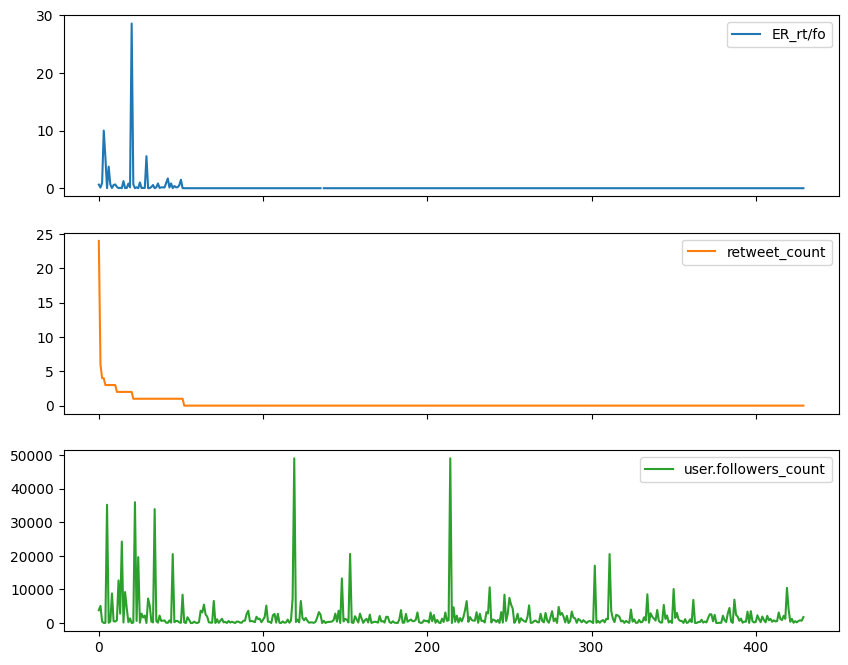

In [22]:
# 创建简单图表来大致查看【rt值】、【fo值】和【rt/fo值】的关系

df[['ER_rt/fo','retweet_count','user.followers_count']].plot(subplots=True, figsize=(10,8))

# ⭕ df[['列1','列2','列3']] 代表选择了这三个列

# ⭕【subplots 参数】
#   默认 subplots = False，即，所有列的图像都显示在同一个图标里
#   subplots = True 之后，分别给每个列单独创建一个图标

# ⭕【kind 参数】
#   不设置 kind 参数的话，默认 kind = 'line'，自动生成折线图
#   柱状图：kind = 'bar'
#   直方图：kind = 'hist'
#   散点图：kind = 'scatter'
#   饼状图：kind = 'pie'

# ⭕【figsize 参数】
#   figsize = (图表宽度, 图表高度)   # 填数字，单位为英寸

# **3. Finding Duplicates**

In [23]:
# 用 df.duplicated() 函数判断 df 中的值是否为【重复值】
df = df[~df.duplicated()]   # 只保留 df 中非重复值的行

# ⭕df.duplicated() 函数用于判断每【行】是否是【重复值】，如果是【重复值】则返回 True，反之 False，最终返回一个布尔值 Series

In [24]:
# 用 df.duplicated() 函数筛选【同一个用户】在【同一天】【发了复数条贴】的【行】
df[df.duplicated(subset=['user','date'], keep=False)]

# ⭕subset = ['user', 'date'] 代表判断【重复值】时，必须满足【这两列同时重复】
#   比如：
#       ___|_user__|__date__|__
#        0 |  小A  |  周四   |       A4
#        1 |  小B  |  周四   |       B4
#        2 |  小A  |  周五   |       A5
#        3 |  小A  |  周四   |       A4
#   同时满足 user 和 date 都相等的【重复值】行是 0行 和 3行

,date,utc_time,mentions,content,url,retweet_count,favorite_count,user,user.location,user.followers_count,user.friends_count,user.created_at,user.favourites_count,user.verified,followers (1000s),ER_rt/fo
7,29/02/2020,14:42:01,@MCRCycleSam @CatrionaSwanson @bricycle @marty...,A gathering of UK transport activists; cycle s...,https://t.co/OcyyKkhmUh,3,15,davelostdave,somewhere,459,1287,15/06/2009,23700,False,0.459,0.653595
10,29/02/2020,23:41:58,@CatrionaSwanson @Chris_Boardman @Chris_Boardman,Maybe we could put the spotlight on #Bradford ...,https://t.co/0ExO7wr1ld,3,11,davelostdave,somewhere,459,1287,15/06/2009,23700,False,0.459,0.653595
57,08/02/2020,00:52:07,@TOIFood,I made a unique chicken curry by using beer.. ...,https://t.co/RkoybcJ8ft,0,1,RecipeKiPotli,"New Delhi, India",12,32,03/02/2020,44,False,0.012,0.000000
60,08/02/2020,00:57:31,@foodandwine,I made a unique chicken curry by using beer.. ...,https://t.co/RkoybcJ8ft,0,0,RecipeKiPotli,"New Delhi, India",12,32,03/02/2020,44,False,0.012,0.000000
103,16/12/2020,06:53:00,@curry_x_beer,????????????????????????????????????www\r\n\r\...,https://t.co/3p0g3pe6I2,0,2,TsuyuriKumin5MT,????? ???? ??????,379,491,01/01/2014,58885,False,0.379,0.000000
104,16/12/2020,06:57:53,@curry_x_beer,???w,https://t.co/jHN12BGiWX,0,2,TsuyuriKumin5MT,????? ???? ??????,379,491,01/01/2014,58885,False,0.379,0.000000
107,07/07/2020,07:23:18,@beer_usagi,?????…???????…\r\n????????…\r\n???????\r\n?????,https://t.co/rFFeqGaVIU,0,0,akakuro_curry,?????????2-11-4 ???? B1F,2730,3863,24/08/2018,24660,False,2.730,0.000000
109,07/07/2020,07:27:06,@beer_usagi,?????????,https://t.co/EPiOnl6zyu,0,1,akakuro_curry,?????????2-11-4 ???? B1F,2730,3863,24/08/2018,24660,False,2.730,0.000000
115,11/04/2020,07:46:39,@curry_x_beer,???????…??\r\n???????????????????????…\r\n,https://t.co/BgkNj3a0fe,0,0,Friends_quail,NaN,1020,1101,06/12/2015,126694,False,1.020,0.000000
121,11/04/2020,08:11:23,@curry_x_beer,????????????,https://t.co/BwS1A7C1gM,0,1,Friends_quail,NaN,1020,1101,06/12/2015,126694,False,1.020,0.000000


# **4. Reordering & Reshaping Data**

In [25]:
# 用 df.sort_values() 函数来给【行】排序
df.sort_values(by=['retweet_count','user.followers_count'],ascending=False)

# 👆先按照【转发数】从高到低排序，重复的值再继续按照【粉丝数】从高到低排序

# ⭕【by 参数】
#   by = 列名（字符串或者列表）
#   同时写多个列，按照顺序逐个 sort

# ⭕ascending = False 代表按照降序（从高到低）排序

,date,utc_time,mentions,content,url,retweet_count,favorite_count,user,user.location,user.followers_count,user.friends_count,user.created_at,user.favourites_count,user.verified,followers (1000s),ER_rt/fo
0,06/05/2020,11:11:49,0,NINE SPICES?????????????????\n?9??SPICE????NIN...,https://t.co/wddjIaJTcD,24,12,9spices,??????????2-1-2 HANROKU??B1,3820,1961,10/02/2010,296,False,3.820,0.628272
1,07/07/2020,08:08:54,@lizzie_hubbard2 @JetsettersFlyin @suziday123 ...,Thanks for the invite to join #TravelWinePart...,https://t.co/6Z7GgkJE8v,6,17,ExpressionsSA,Cape Town South Africa,5088,5284,24/06/2011,15625,False,5.088,0.117925
2,31/03/2020,13:39:02,@craftbeerncl! @RidgesideBrewer @Manjitskitche...,Lovely folk #Leeds delivered a mixed box of th...,https://t.co/XXsNBqu3ix,4,8,LeftyRedCat,"Leeds, Yorkshire, The North.",446,1583,22/06/2014,15457,False,0.446,0.896861
3,29/05/2020,20:58:17,@StCannas @keralankaravan,the perfect evening guys! Thanks for the amaz...,https://t.co/3Ec1zryIlO,4,15,lukeybabeee,"Wales, United Kingdom",40,242,10/08/2013,73,False,0.040,10.000000
5,01/07/2020,06:35:04,0,Makanan yg paling dianggap deluxe dan disukai ...,https://t.co/jkcO3zaQvv,3,21,Mentimoen,NaN,35214,596,28/05/2016,530,False,35.214,0.008519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,21/12/2020,00:40:48,@DubiousEngineer @KempeneerVan @startrekcbs,"Rimmer stole Lister's beer curry, traveled to...",https://t.co/4nDHg9jPcR,0,1,TheRealLuFeral,Where I feel like being.,3,19,08/11/2020,202,False,0.003,0.000000
376,25/07/2020,20:34:17,@TheWhiteHag,Ok lads...sorry we can’t be in Ballymote today...,https://t.co/JVnjY863kI,0,1,FoldingWheels,NaN,2,16,20/05/2010,43,False,0.002,0.000000
208,12/09/2020,14:02:16,@liamgallagher @liamgallagher,Curry after a few beers,https://t.co/xyX7Xh0xS9,0,0,paddynpipes,NaN,1,19,10/02/2020,59,False,0.001,0.000000
301,30/05/2020,18:18:36,@skynewsSam,We did the other day. \r\nTonight it curry &am...,https://t.co/d0Ju7pmWDR,0,1,MikeCha81015561,NaN,1,41,14/05/2020,1535,False,0.001,0.000000


In [26]:
df.transpose()   # 转置 Dataframe，行变列，列变行

,0,1,2,3,4,5,6,7,8,9,...,420,421,422,423,424,425,426,427,428,429
date,06/05/2020,07/07/2020,31/03/2020,29/05/2020,28/11/2020,01/07/2020,08/01/2020,29/02/2020,03/05/2020,16/01/2020,...,10/04/2020,27/11/2020,09/12/2020,25/03/2020,25/06/2020,30/12/2020,30/08/2020,04/03/2020,10/08/2020,07/03/2020
utc_time,11:11:49,08:08:54,13:39:02,20:58:17,04:46:37,06:35:04,10:26:36,14:42:01,17:05:51,17:50:08,...,23:23:26,23:31:09,23:32:06,23:36:02,23:38:41,23:45:00,23:54:19,23:55:19,23:55:38,23:59:42
mentions,0,@lizzie_hubbard2 @JetsettersFlyin @suziday123 ...,@craftbeerncl! @RidgesideBrewer @Manjitskitche...,@StCannas @keralankaravan,@yooneedmorejodi,0,0,@MCRCycleSam @CatrionaSwanson @bricycle @marty...,@DrewPritchard,@Nellachops73 @MotorheadBeer @CameronsBrewery ...,...,@ashley_collings,@101andyhibberd,@MariaMo71609443 @jckiker @ScottAdamsSays,@lonelyplanet,0,@Photos_in_Chile,@jesshousty @WilliamHousty,@beer_porter @siretoknote,0,0
content,NINE SPICES?????????????????\n?9??SPICE????NIN...,Thanks for the invite to join #TravelWinePart...,Lovely folk #Leeds delivered a mixed box of th...,the perfect evening guys! Thanks for the amaz...,Among other yummy treats: curry goat dumplings...,Makanan yg paling dianggap deluxe dan disukai ...,DJ??\r\n?????????(THE ACT WE ACT)\r\nIQUINE???...,A gathering of UK transport activists; cycle s...,many thanks again for #SalvageSundays enjoy yo...,has gone out for a curry so im having a beer! ...,...,Lets say its a rather unsual place. Middle of ...,Just the two tonight Andy? Obviously the meeti...,The reason I read and study about health 7 day...,Lots of great meals from all over the world! ...,Not bad for a first time. Will just use rice i...,This Alturis Muller Thurgau will make you kick...,I just made zucchini blossoms fried in a curry...,??????????????????????????????????????????????...,Made the terrible horrible no-good mistake of ...,This is how I'm celebrating tonight y'all! Bee...
url,https://t.co/wddjIaJTcD,https://t.co/6Z7GgkJE8v,https://t.co/XXsNBqu3ix,https://t.co/3Ec1zryIlO,https://t.co/CHql64ZpIN,https://t.co/jkcO3zaQvv,https://t.co/82mcqYbon7,https://t.co/OcyyKkhmUh,https://t.co/h9rKtPhIk2\r\nAntiques Collectabl...,https://t.co/HwLDw9Nys7,...,https://t.co/kehHDSkSho,https://t.co/ajvsgjYZMz,https://t.co/qbzfUAWyR8,https://t.co/boqkzogJDP,https://t.co/sb0494Cxqy,https://t.co/TKqzhFmgHi,https://t.co/WRIeWKVQbE,https://t.co/Rd2xiyo6uk,https://t.co/AF23qFRBTv,https://t.co/Fh7wRYCguR
retweet_count,24,6,4,4,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
favorite_count,12,17,8,15,4,21,3,15,11,14,...,0,1,0,1,4,1,1,1,3,30
user,9spices,ExpressionsSA,LeftyRedCat,lukeybabeee,BitsAndBikkles,Mentimoen,curry_meeting,davelostdave,retonthenet,neilrob9,...,Tommy_Oldham1,Thurstonsbrew,HenrikWallin3,Sprouley11,Ian_Lord,kitty_litter_1,mrauliuk,comin_curry,elizvogt,Rose262
user.location,??????????2-1-2 HANROKU??B1,Cape Town South Africa,"Leeds, Yorkshire, The North.","Wales, United Kingdom",Jamaica,NaN,NaN,somewhere,West Coast Lancashire England,lincoln,...,"Shaw, Oldham","South East, England","Linköping, Sweden",NaN,South End BTV,NaN,Treaty 1,Kushiro Hokkaido Japan,"NYC now, Texas forever","Atlanta, GA"
user.followers_count,3820,5088,446,40,56,35214,80,459,8805,535,...,4139,378,1245,96,554,210,599,820,687,1776


# **5. Joining Data**

In [27]:
# 另一个本地 CSV 文件的路径
path1 = 'E:/Jupyter Notebooks/COMM327/W02_Processing_Data/keto_AND_vegan.csv'
# ⭕【注意】要用正斜杠【/】，或者转义反斜杠【\\】

In [28]:
# 读取为 path1 的 csv 文件为 DataFrame df2
df2 = pd.read_csv(path1, encoding = 'latin-1')

In [29]:
df2

,created_at,utc_time,mentions,text,url,retweet_count,favorite_count,user,user.location,user.followers_count,user.friends_count,user.created_at,user.favourites_count,user.verified
0,01/01/2020,23:10:27,@BioLayne,is one of the most respected and unbiased nutr...,https://t.co/WDDhoIvXl5,0,0,Eric_OGrey,"Sacramento, CA",2333,1084,10/03/2016,23996,False
1,02/01/2020,18:16:26,@greggprescott1,"I am O +, which is high protein, than fat, the...",https://t.co/1hBpp6MGnu,0,0,Glory32X,Belgium,636,64,11/07/2009,22357,False
2,02/01/2020,19:50:17,@DJNYC1,Vegan keto is no punk b/c you have to cut out ...,https://t.co/Gly73GsZA8,0,1,exavierpope,#BestDressedManonTV,34701,6616,19/06/2009,91685,True
3,02/01/2020,23:18:00,@johnsveitch @LouiseStephen9,"LCHF, KETO and now Relaxed Carnivore 2 years h...",https://t.co/4urzeWMKfW,0,0,Dave06031956,"Mackenzie, Brisbane",2494,2821,15/03/2016,65684,False
4,03/01/2020,23:07:17,@amberella06 @CameronNewton,Hopefully just quitting mediocre vegan food an...,https://t.co/qAVEhKY7Ea,0,1,JTFC_TM,"Get a warrant, Fed",393,612,15/05/2019,10252,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,30/12/2020,18:13:04,@agargmd @VeganKitty2 @respectfullivin @Vegane...,"I agree, i do not recommend vegan keto for dia...",https://t.co/2Hk9UOZnT4,0,4,vegannutrition1,"London, England",16941,5087,04/10/2017,57810,False
594,30/12/2020,19:55:09,@drnadolsky @,#keto #vegan #healthydiet#vegetarian #healthyf...,https://t.co/qozgT0VZWQ,0,0,ahimsadiet,"Bay Area, CA",1255,3692,08/06/2015,6398,False
595,30/12/2020,20:34:31,@MontezFordWWE,"bruh I gotta know how'd you do it? Keto,Vegan?",https://t.co/nSnW7yvPqa,0,0,jtsports12,"Torrance, CA",176,375,16/02/2017,23376,False
596,31/12/2020,14:00:24,@Jennaclarkson18,Sending you all best wishes??????. Happy new y...,https://t.co/VoCQaqhJzQ\n\nIs a Vegan Ketogeni...,0,0,fitskimmers,London United Kingdom,337,707,12/08/2017,3567,False


In [30]:
# ⭕用 pd.concat() 函数来 concatenate (连接) 两个 csv 表格
pd.concat([df,df2])

# 👆 把 df2 直接拼接在 df 的下面，仅当两个表格的【列】一一对应时有效

# ⭕注意1：
#   第二个表的 index 本来是默认从 0 开始，concatenate 到第一个表的下面之后，其 index 不变，仍从 0 开始
#   所以这时可以重置合并后的 DataFrame 的 index

# ⭕注意2：
#   按照先后顺序，把 df2 接在 df 的后面，则新表的 columns label 以排在前面的 df 为准，下面的表头即使和上面不一样也不会保存。

,date,utc_time,mentions,content,url,retweet_count,favorite_count,user,user.location,user.followers_count,user.friends_count,user.created_at,user.favourites_count,user.verified,followers (1000s),ER_rt/fo,created_at,text
0,06/05/2020,11:11:49,0,NINE SPICES?????????????????\n?9??SPICE????NIN...,https://t.co/wddjIaJTcD,24,12,9spices,??????????2-1-2 HANROKU??B1,3820,1961,10/02/2010,296,False,3.820,0.628272,NaN,NaN
1,07/07/2020,08:08:54,@lizzie_hubbard2 @JetsettersFlyin @suziday123 ...,Thanks for the invite to join #TravelWinePart...,https://t.co/6Z7GgkJE8v,6,17,ExpressionsSA,Cape Town South Africa,5088,5284,24/06/2011,15625,False,5.088,0.117925,NaN,NaN
2,31/03/2020,13:39:02,@craftbeerncl! @RidgesideBrewer @Manjitskitche...,Lovely folk #Leeds delivered a mixed box of th...,https://t.co/XXsNBqu3ix,4,8,LeftyRedCat,"Leeds, Yorkshire, The North.",446,1583,22/06/2014,15457,False,0.446,0.896861,NaN,NaN
3,29/05/2020,20:58:17,@StCannas @keralankaravan,the perfect evening guys! Thanks for the amaz...,https://t.co/3Ec1zryIlO,4,15,lukeybabeee,"Wales, United Kingdom",40,242,10/08/2013,73,False,0.040,10.000000,NaN,NaN
4,28/11/2020,04:46:37,@yooneedmorejodi,Among other yummy treats: curry goat dumplings...,https://t.co/CHql64ZpIN,3,4,BitsAndBikkles,Jamaica,56,2,20/07/2020,8,False,0.056,5.357143,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,NaN,18:13:04,@agargmd @VeganKitty2 @respectfullivin @Vegane...,NaN,https://t.co/2Hk9UOZnT4,0,4,vegannutrition1,"London, England",16941,5087,04/10/2017,57810,False,NaN,NaN,30/12/2020,"I agree, i do not recommend vegan keto for dia..."
594,NaN,19:55:09,@drnadolsky @,NaN,https://t.co/qozgT0VZWQ,0,0,ahimsadiet,"Bay Area, CA",1255,3692,08/06/2015,6398,False,NaN,NaN,30/12/2020,#keto #vegan #healthydiet#vegetarian #healthyf...
595,NaN,20:34:31,@MontezFordWWE,NaN,https://t.co/nSnW7yvPqa,0,0,jtsports12,"Torrance, CA",176,375,16/02/2017,23376,False,NaN,NaN,30/12/2020,"bruh I gotta know how'd you do it? Keto,Vegan?"
596,NaN,14:00:24,@Jennaclarkson18,NaN,https://t.co/VoCQaqhJzQ\n\nIs a Vegan Ketogeni...,0,0,fitskimmers,London United Kingdom,337,707,12/08/2017,3567,False,NaN,NaN,31/12/2020,Sending you all best wishes??????. Happy new y...


In [31]:
# ⭕重置 index 并去除原来的混乱 index
pd.concat([df,df2]).reset_index(drop=True)

# drop 参数默认为 False，即不去除原本的 index，作为新的列保存
# inplace 参数默认为 False，即不直接应用于df

,date,utc_time,mentions,content,url,retweet_count,favorite_count,user,user.location,user.followers_count,user.friends_count,user.created_at,user.favourites_count,user.verified,followers (1000s),ER_rt/fo,created_at,text
0,06/05/2020,11:11:49,0,NINE SPICES?????????????????\n?9??SPICE????NIN...,https://t.co/wddjIaJTcD,24,12,9spices,??????????2-1-2 HANROKU??B1,3820,1961,10/02/2010,296,False,3.820,0.628272,NaN,NaN
1,07/07/2020,08:08:54,@lizzie_hubbard2 @JetsettersFlyin @suziday123 ...,Thanks for the invite to join #TravelWinePart...,https://t.co/6Z7GgkJE8v,6,17,ExpressionsSA,Cape Town South Africa,5088,5284,24/06/2011,15625,False,5.088,0.117925,NaN,NaN
2,31/03/2020,13:39:02,@craftbeerncl! @RidgesideBrewer @Manjitskitche...,Lovely folk #Leeds delivered a mixed box of th...,https://t.co/XXsNBqu3ix,4,8,LeftyRedCat,"Leeds, Yorkshire, The North.",446,1583,22/06/2014,15457,False,0.446,0.896861,NaN,NaN
3,29/05/2020,20:58:17,@StCannas @keralankaravan,the perfect evening guys! Thanks for the amaz...,https://t.co/3Ec1zryIlO,4,15,lukeybabeee,"Wales, United Kingdom",40,242,10/08/2013,73,False,0.040,10.000000,NaN,NaN
4,28/11/2020,04:46:37,@yooneedmorejodi,Among other yummy treats: curry goat dumplings...,https://t.co/CHql64ZpIN,3,4,BitsAndBikkles,Jamaica,56,2,20/07/2020,8,False,0.056,5.357143,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,NaN,18:13:04,@agargmd @VeganKitty2 @respectfullivin @Vegane...,NaN,https://t.co/2Hk9UOZnT4,0,4,vegannutrition1,"London, England",16941,5087,04/10/2017,57810,False,NaN,NaN,30/12/2020,"I agree, i do not recommend vegan keto for dia..."
1024,NaN,19:55:09,@drnadolsky @,NaN,https://t.co/qozgT0VZWQ,0,0,ahimsadiet,"Bay Area, CA",1255,3692,08/06/2015,6398,False,NaN,NaN,30/12/2020,#keto #vegan #healthydiet#vegetarian #healthyf...
1025,NaN,20:34:31,@MontezFordWWE,NaN,https://t.co/nSnW7yvPqa,0,0,jtsports12,"Torrance, CA",176,375,16/02/2017,23376,False,NaN,NaN,30/12/2020,"bruh I gotta know how'd you do it? Keto,Vegan?"
1026,NaN,14:00:24,@Jennaclarkson18,NaN,https://t.co/VoCQaqhJzQ\n\nIs a Vegan Ketogeni...,0,0,fitskimmers,London United Kingdom,337,707,12/08/2017,3567,False,NaN,NaN,31/12/2020,Sending you all best wishes??????. Happy new y...


# **6. Groupby & AGG**

**有时会需要求出特定属性 (attribute) 下，多个条目（observation）的特定数据的总计值 (to aggregate)。**  

**e.g.** 求【同一个用户】发的【所有帖子】的【转发量总和】
* **第一步：** 用 `df.groupby()` 函数把【特定列：用户名】的相同值 (用户名相同)【所在的行 (条目)】都分为同一组。  
* **第二步：** 用 `agg()` 函数计算这些条目在【特定列：转发量】的【总和】。

In [32]:
# 用 df.groupby() 函数把数据分组，再用 .agg() 函数求取统计值
df_agg = df.groupby('user').agg({'retweet_count':'sum','user.followers_count':'mean'})   
# 1️⃣ 按照 'user'【列】进行组合，所有用户名相同的【条目(行)】都分为一组
# 2️⃣ 对 '转发量' 列【求总和】；对 '粉丝数' 列【求平均值】。

# ⭕【df.groupby() 函数】 
#   1️⃣ df.groupby() 括号内填【列名】(column label) ，是字符串 (str)。或者 list (多个列)。
#   2️⃣ df.groupby() 的结果是一个 groupby object (对象)，而不是一个 DataFrame 或 Series 或 List 或 Dictionary
#       但是 df.groupby() 之后再用 .agg() 统计之后，结果是一个【只包含统计结果】的 DataFrame 或 Series

# ⭕【.agg() 函数】
#   括号内填 dict like (字典形式) 内容：
#   .agg({'列名1':'求值类型','列名2':'求值类型'})

In [33]:
df_agg  # 统计结果表格，共 390 个条目

# 此表中，‘retweet_count’ 列表示的是每个用户自己发的所有帖子的转发量【总和】；
# 而‘user.followers_count’ 列表示的是每个用户在原 df 中所有自己的条目里，粉丝数的【平均值】。

,retweet_count,user.followers_count
user,,
1nnkeeper,0,557.0
353a9f40f97e4a9,2,4440.0
6M70_JET,0,548.0
9spices,24,3820.0
ASandfort,0,340.0
...,...,...
wolfmanwalter13,0,1112.0
y_yt,0,3149.0
yamaaaaaaaa21,0,251.0


In [34]:
# 用 duplicated() 函数检验上面 groupby() 的结果【条目数】是否正确
df[~df.duplicated(subset='user')].shape

# ⭕【df.duplicated()】
#   keep 参数默认为 'First'，即，“没有重复用户名的 df” 返回的结果中，每个用户名只保留第一条条目。
#   即，和 groupby() 之后一样，每个用户名都有且仅有一个条目，都是 390 行。

# ⭕注：可以查看 .shape 属性，也可以用 len() 函数求长度

(390, 16)

In [35]:
# 查看 df 总条目数
len(df)  # df 全部一共有 430 个条目

# ⭕注：上面查看了.shape 属性，此处用了 len() 函数求长度

430

# **7. Melt & Pivot**

In [36]:
# 用 df_ 作为演示
df_ = pd.DataFrame(data=[['cat',4,5],['dog',7,4],['rabbit',2,3]],
	columns=['pet','male','female'])

In [37]:
df_  # ⭕现在有这样一个 “wide” 的 DataFrame，我们要用 df.melt() 函数让它变成 “long” 形式的 DataFrame，使其更 “tidy”，方便后期统计、制图

,pet,male,female
0,cat,4,5
1,dog,7,4
2,rabbit,2,3


In [38]:
df_.melt() 

# ⭕直接 melt() 的话，所有表头都将融入数据，只形成两列，【变量（名）】和【值（频率）】
# ⭕注：df_.melt() 和 pd.melt(df_) 的效果一样

,variable,value
0,pet,cat
1,pet,dog
2,pet,rabbit
3,male,4
4,male,7
5,male,2
6,female,5
7,female,4
8,female,3


In [39]:
# 用 melt() 函数来把表头融入数据值中（又称 “unpivot”）
pd.melt(df_, id_vars=['pet'], value_vars=['male','female'],var_name='sex', value_name='count')

# ⭕pd.melt() 函数括号内的 df_（第一个参数）是需要 “被融化” 的 DataFrame
#   df_.melt() 和 pd.melt(df_) 的效果一样

# ⭕此处：把原表中的 'pet'【列】保留，作为标识符列；再把 'male' 'female' 两【列】融成新的【变量列】；再把【变量列】命名为 “sex”；【值列】命名为 “count”

# ⭕【melt() 函数中的参数】
#    注意：此处的 “变量 (variables)” 即为 “属性 (attributes)” ，即【列】
#   1️⃣【id_vars】用于充当 identifier variables (标识符，即 “名称” 等) 的【列】的表头，不被 “融化（融入数据值中）”，id_vars 列的原标签（表头）将被保留。
#   2️⃣【value_vars】需要 “融化” 入表内当作【变量数据】的【列】
#   3️⃣【var_name】新表中【变量列】的名称 (标签)
#   4️⃣【value_name】新表中【值列】的名称 (标签)

,pet,sex,count
0,cat,male,4
1,dog,male,7
2,rabbit,male,2
3,cat,female,5
4,dog,female,4
5,rabbit,female,3


In [40]:
df_  # 原表。上面两个代码块中都没有直接赋值 (`df_ = 新表`) ，所以原表不变。

,pet,male,female
0,cat,4,5
1,dog,7,4
2,rabbit,2,3


# **8. Histogram, Data Distribution & Skew**

# **9.Correlation, Causation & Coincidence**